# Answer 4
* Now we will be working on with previous week linear regression's data i.e 'Ames_Housing_Sales'

In [ ]:
import pandas as pd
import os
import numpy as np
data_path=['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')
Stringdata=data.select_dtypes(include=[object])
dataint=data.drop(columns=Stringdata.columns)
data.shape

In [ ]:
import re
#dataint=dataint.apply(lambda x: x.replace('null',0) if 'null' in x  else(x.replace('None',0) if 'None' in x else 0))
# Now one hot encode string data

# dataint.replace('null',0)
# dataint.replace('null',0)
# dataint.replace('null',0)
Stringdata=pd.get_dummies(Stringdata)
sd=list(Stringdata.columns)
l=[]
# al=list(map(lambda x: re.findall(r"\w+_None",x) if x in re.findall(r"\w+_None",x) else 0,Stringdata.columns))
# for i in al:
#     if type(i)==list:
#         Stringdata=Stringdata.drop(columns=i)
Stringdata

In [ ]:
#concat data i.e stringdata and data int
from sklearn.model_selection import train_test_split
data1=pd.concat([Stringdata,dataint],axis=1)
X=[i for i in data1.columns if i!='SalePrice']
X_data=data1[X]
Y_data=data1['SalePrice']

X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data, test_size=0.3,random_state=42)
data1



In [6]:
import matplotlib.pylab as plt

# X=[i for i in X_train.columns]
# X_skew=data1[X].skew()
# Y_skew=Y_train.skew()

# test=plt.hist(X_train,bins=20)# by this we can say its positively skewed that is its right skew
X_train.shape

(965, 294)

**how to find theoritically whether a data is skewed or not**

In [7]:
#take out float columns
floatcols=X_train.select_dtypes(include=[float])
# yskew=pd.Series()
# xskew = X_train[floatcols.columns].skew().sort_values(ascending=False)
# yskew['SalePrice']=Y_train.skew()
# skewdata=pd.concat([xskew,yskew])
# skewness=pd.DataFrame({'Skew':skewdata})
# skewness

skew_vals = X_train[floatcols.columns].skew()
skew_limit=0.75
skewness = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))


**Log Transformation**
* For getting rid of skewness in the data we use certain tranformations , log tranformation is the best to attain normal distribution

pandas.core.frame.DataFrame

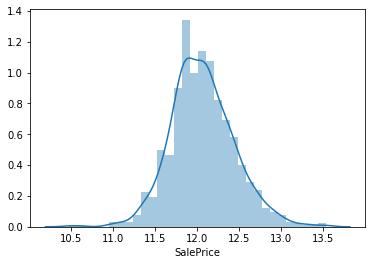

In [8]:
import seaborn as sns
log_y=np.log(Y_train)
sns.distplot(log_y)
type(X_train)

In [9]:
# change total data to traansformed data

# for i in X:
pd.options.mode.chained_assignment = None

for col in skewness.index.tolist():
    if col == "SalePrice":
        continue
    X_train[col] = np.log1p(X_train[col])
    X_test[col]  = X_test[col].apply(np.log1p)


In [10]:
from sklearn.preprocessing import MaxAbsScaler

mas=MaxAbsScaler()
# X_train=mas.fit_transform(X_train)
# X_test=mas.fit_transform(X_test)
# X_train=np.nan_to_num(X_train)
# X_test=np.nan_to_num(X_test)
X_train.shape,Y_train.shape

((965, 294), (965,))

## Answer 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [11]:
from sklearn.metrics import mean_squared_error

# Y_train=Y_train.transform(lambda x: 0 if x=='NaN' else x)
# Y_train=pd.Series(np.nan_to_num(Y_train.values))
# Y_test=pd.Series(np.nan_to_num(Y_test.values))
# X_train=X_train.replace(np.nan, 0)
# X_test=X_test.replace(np.nan, 0)
def rmse(yreal,yprediction):
    return np.sqrt(mean_squared_error(yreal,yprediction))


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [12]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR=LR.fit(X_train,Y_train)
y_predict=LR.predict(X_test)

In [13]:
print(rmse(Y_test,y_predict))

21545060664479.81


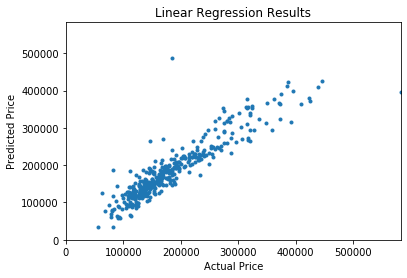

In [14]:
a=plt.axes()
a.plot(Y_test, y_predict,marker='o',ls='',ms=3.0)

range=0,max(Y_test)
a.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=range,
       ylim=range,
       title='Linear Regression Results');

## Answer 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

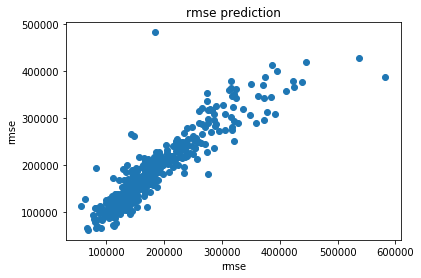

In [15]:
from sklearn.linear_model import RidgeCV
l=[0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]

r=RidgeCV(alphas=l,cv=4)
r=r.fit(X_train,Y_train)
ridgeypred=r.predict(X_test)
meansquareddistance=rmse(Y_test,ridgeypred)
ax=plt.axes()
lim=0,max(Y_test)
ax.set(xLabel='rmse',yLabel='rmse',title='rmse prediction')
ax.plot(Y_test,ridgeypred,marker='o',ls='')

## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.
/
* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via tabl//
e and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [16]:
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LassoCV
l=[1e-5, 5e-5, 0.0005, 0.0001]
lasso=LassoCV(alphas=l,max_iter=5e4,
                  cv=3)
lasso=lasso.fit(X_train,Y_train)
lay_pred=lasso.predict(X_test)
rmse(Y_test,lay_pred)
lasso.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92726550092.98732, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92714144744.7006, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92714005754.47012, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

0.0005

#### elastic cv

## R & D
* why linspace?
* what is l1_ratio?why its used?


In [39]:
pd.options.mode.chained_assignment = None
from sklearn.linear_model import ElasticNetCV


l1_ratios = np.linspace(0.1, 0.9, 9)

elastic = ElasticNetCV(alphas=l,max_iter=5e4,cv=3,l1_ratio=l1_ratios)
elastic=elastic.fit(X_train,Y_train)
elastic_ypred=elastic.predict(X_test)
rmse(Y_test,elastic_ypred),elastic.alpha_
l1_ratios

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23646233382.8898, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95675592271.35472, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104426514482.8923, tolerance: 387053725.58786315
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65616230635.27674, tolerance: 391106099.7531176
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110702507823.0846, tolerance: 391106099.7531176
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5303523086.736633, tolerance: 442399396.3673559
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You migh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93404585197.8912, tolerance: 442399396.3673559
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117796423383.32051, tolerance: 442399396.3673559
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126250975732.05745, tolerance: 442399396.3673559
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## Comparing Results 

In [18]:
comp=pd.DataFrame()
comp['ridge_predict']=ridgeypred
comp['lasso_pred']=lay_pred
comp['elastic_pred']=elastic_ypred

In [19]:
comp

,ridge_predict,lasso_pred,elastic_pred
0,336039.453389,353354.768543,348901.981290
1,128123.764198,128680.388934,127829.435011
2,96803.798279,98920.841695,87635.462876
3,230531.272142,227264.994854,229945.111325
4,201127.953923,190603.592650,192405.375683
...,...,...,...
409,66000.700803,61061.002064,63405.022083
410,105242.308128,99442.253835,98856.186752
411,198913.427124,195800.260237,194383.115496
412,155161.679761,155700.517070,155881.255248


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


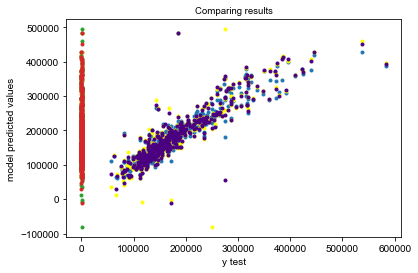

In [20]:
import seaborn as sns
a=plt.axes()
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('rainbow')
a.set(xLabel='y test',yLabel='model predicted values',title='Comparing results')
a.plot(Y_test,comp.ridge_predict,comp,marker='o',ls='',ms=3.0)
b=plt.axes()
b.plot(Y_test,comp.lasso_pred,marker='o',ls='',ms=3.0,color='yellow')
c=plt.axes()
c.plot(Y_test,comp.elastic_pred,marker='o',ls='',ms=3.0,color='indigo')

# Answer 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

In [21]:
from sklearn.linear_model import SGDRegressor
def modelfits(penalty,alpha,optional):
    SGDreg= SGDRegressor(eta0=1e-7,loss='squared_loss',alpha=alpha,penalty=penalty,l1_ratio=optional)
    SGDreg=SGDreg.partial_fit(X_train, Y_train)
    Y_pred= SGDreg.predict(X_test)
    rmseSGD=rmse(Y_test,Y_pred)
    return Y_pred

In [22]:
compare=pd.Series()
compare['rmseSGDvthoutscaling']=modelfits('L1',meansquareddistance,0),modelfits('L2',lasso.alpha_,0),modelfits('elasticnet',elastic.alpha_,elastic.l1_ratio_)
compare

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


rmseSGDvthoutscaling    ([164102.14020278305, 161424.63061143985, 1578...
dtype: object

## R & D
* why did yu use learning rate? i.e eta0=1e-7?
* what is its use?
* what is squared loss?
* why penalty?
* why alpha?


* scale the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()
X_train_scaled=msc.fit_transform(X_train)
def modelfitsagain(penalty,alpha,optional):
    SGDreg= SGDRegressor(eta0=1e-7,loss='squared_loss',alpha=alpha,penalty=penalty,l1_ratio=optional)
    SGDreg=SGDreg.partial_fit(X_train, Y_train)
    Y_pred= SGDreg.predict(X_test)
    rmseSGD=rmse(Y_test,Y_pred)
    return rmseSGD


In [24]:
compare['rmseSGDvthscale']=modelfitsagain('L1',meansquareddistance,0),modelfitsagain('L2',lasso.alpha_,0),modelfitsagain('elasticnet',elastic.alpha_,elastic.l1_ratio_)

In [25]:
compare

rmseSGDvthoutscaling    ([164102.14020278305, 161424.63061143985, 1578...
rmseSGDvthscale         (77148.43418734217, 84481.01044434751, 76589.5...
dtype: object

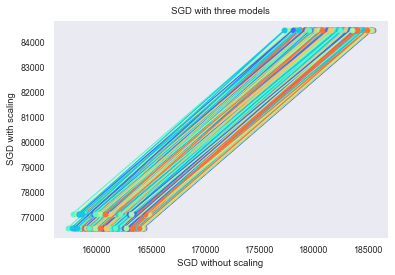

In [26]:
ap=plt.axes()
ap.set(xLabel='SGD without scaling',yLabel='SGD with scaling',title='SGD with three models')
ap.plot(compare['rmseSGDvthoutscaling'],compare['rmseSGDvthscale'],marker='o')

* comparing y pred this time

In [27]:
def modelfitsagain(penalty,alpha,optional):
    SGDreg= SGDRegressor(eta0=1e-7,loss='squared_loss',alpha=alpha,penalty=penalty,l1_ratio=optional)
    SGDreg=SGDreg.partial_fit(X_train, Y_train)
    Y_pred= SGDreg.predict(X_test)
    
    return Y_pred
compare['SGD with scale predict']=modelfitsagain('L1',meansquareddistance,0),modelfitsagain('L2',lasso.alpha_,0),modelfitsagain('elasticnet',elastic.alpha_,elastic.l1_ratio_)

In [28]:
compare['SGD without scale predict']=modelfits('L1',meansquareddistance,0),modelfits('L2',lasso.alpha_,0),modelfits('elasticnet',elastic.alpha_,elastic.l1_ratio_)


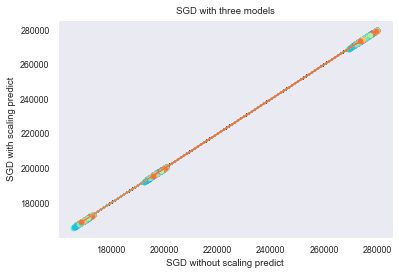

In [29]:
ay=plt.axes()
ay.set(xLabel='SGD without scaling predict',yLabel='SGD with scaling predict',title='SGD with three models')
ay.plot(compare['SGD without scale predict'],compare['SGD without scale predict'],marker='o')

In [ ]:
(X_data.T)

In [ ]:
np.linalg.pinv((X_data.values)*(X_data.T))*((X_data.T)*Y_data)